In [33]:
import pandas as pd

import seaborn as sns

# Qualys 2022 TruRisk Report CVEs

In [34]:
df_qualys2022 = pd.read_csv('../data_in/qualys/qualys_2022_report_cves.csv')
df_qualys2022 = df_qualys2022.rename(columns={"CVE": "cve"})
df_qualys2022

,cve,TITLE,QVS
0,CVE-2021-4034,polkits pkexec Local Privilege Escalation Vuln...,95
1,CVE-2022-0028,Palo Alto Networks PAN-OS Reflected Amplificat...,95
2,CVE-2022-0543,Debian-specific Redis Server Lua Sandbox Escap...,95
3,CVE-2022-0609,Google Chrome Animation Module Use-After-Free ...,95
4,CVE-2022-0824,webmin Improper Access Control to Remote Code ...,75
...,...,...,...
185,CVE-2022-42827,Apple iOS and iPadOS Out-of-Bounds Write Vulne...,95
186,CVE-2022-42856,Apple iOS Type Confusion Vulnerability,95
187,CVE-2022-44698,Microsoft Defender SmartScreen Security Featur...,95
188,CVE-2022-45045,Xiongmai NVR Multiple Devices Arbitrary Comman...,41


In [35]:
df_enriched = pd.read_csv('../data_out/nvd_cves_v3_enriched.csv.gz', compression="gzip")
df_enriched

,cve,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-1999-0199,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00604,False,False,False,False,5
1,CVE-1999-0236,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00137,True,False,False,False,4
2,CVE-2000-0258,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00590,False,False,False,False,5
3,CVE-2000-1254,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00543,False,False,False,False,5
4,CVE-2002-20001,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00544,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141356,CVE-2023-5632,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00044,False,False,False,False,5
141357,CVE-2023-5638,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141358,CVE-2023-5639,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141359,CVE-2023-5642,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00890,False,False,False,False,5


In [36]:
df_qualys2022 = pd.merge(df_qualys2022, df_enriched,  on='cve', how='left').fillna(False)
df_qualys2022

,cve,TITLE,QVS,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-2021-4034,polkits pkexec Local Privilege Escalation Vuln...,95,7.8,LOW,LOCAL,NONE,LOW,HIGH,HIGH,HIGH,True,False,0.00046,True,True,False,False,0
1,CVE-2022-0028,Palo Alto Networks PAN-OS Reflected Amplificat...,95,8.6,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00340,False,True,False,False,0
2,CVE-2022-0543,Debian-specific Redis Server Lua Sandbox Escap...,95,10.0,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,True,True,0.97103,False,True,False,False,0
3,CVE-2022-0609,Google Chrome Animation Module Use-After-Free ...,95,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.05681,False,True,False,True,0
4,CVE-2022-0824,webmin Improper Access Control to Remote Code ...,75,8.8,LOW,NETWORK,NONE,LOW,HIGH,HIGH,HIGH,True,True,0.97250,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,CVE-2022-42827,Apple iOS and iPadOS Out-of-Bounds Write Vulne...,95,7.8,LOW,LOCAL,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.00070,False,True,False,True,0
186,CVE-2022-42856,Apple iOS Type Confusion Vulnerability,95,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.00178,False,True,False,True,0
187,CVE-2022-44698,Microsoft Defender SmartScreen Security Featur...,95,5.4,LOW,NETWORK,REQUIRED,NONE,NONE,LOW,LOW,False,False,0.00925,False,True,False,False,0
188,CVE-2022-45045,Xiongmai NVR Multiple Devices Arbitrary Comman...,41,8.8,LOW,NETWORK,NONE,LOW,HIGH,HIGH,HIGH,False,False,0.00069,False,False,False,False,5


Text(0.5, 0.98, 'Qualys 2022 CVE report with QVS scores vs EPSS')

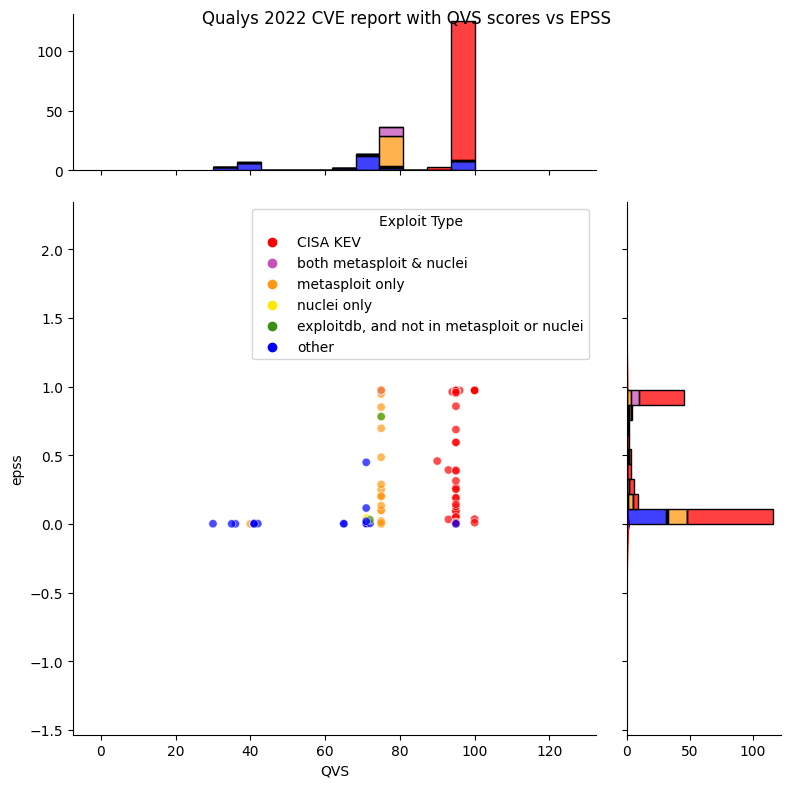

In [37]:
palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

g=sns.jointplot(data=df_qualys2022, x='QVS', y='epss', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type")
g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle("Qualys 2022 CVE report with QVS scores vs EPSS")

Text(0.5, 0.98, 'Qualys 2022 CVE report with QVS scores vs CVSS Base Score')

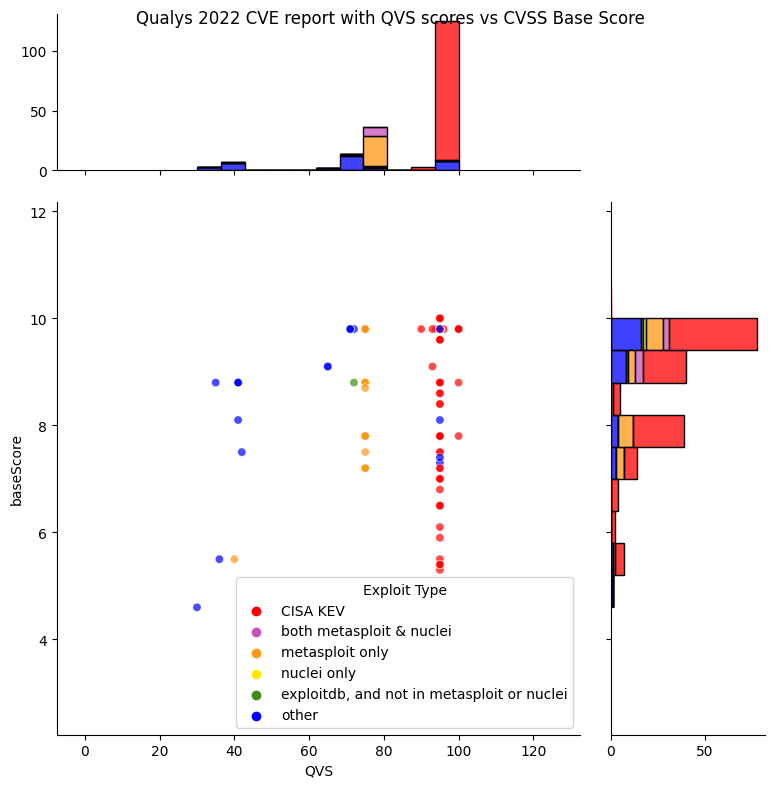

In [38]:
import matplotlib.pyplot as plt

palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

g=sns.jointplot(data=df_qualys2022, x='QVS', y='baseScore', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type")
g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle("Qualys 2022 CVE report with QVS scores vs CVSS Base Score")